In [1]:
# Importing all required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Read My CSV and JSON Files
data = pd.read_csv('/content/drive/MyDrive/Youtube_2/US_youtube_trending_data.csv')
cat = pd.read_json('/content/drive/MyDrive/Youtube_2/US_category_id.json')

In [3]:
data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199185,drvPVTMQ8fU,Film Theory: Mario is IMMORTAL! (Super Mario M...,2023-04-23T17:05:07Z,UC3sznuotAs2ohg_U__Jzj_Q,The Film Theorists,1,2023-04-30T00:00:00Z,Mario|mario movie|super mario bros|super mario...,2475971,109521,0,6203,https://i.ytimg.com/vi/drvPVTMQ8fU/default.jpg,False,False,*SUBSCRIBE to Film Theory!*Don't miss a Film T...
199186,0nMgqZtksyc,Aaron Rodgers Has OFFICIALLY Been Traded To Th...,2023-04-24T20:40:51Z,UCxcTeAKWJca6XyJ37_ZoKIQ,The Pat McAfee Show,17,2023-04-30T00:00:00Z,pat mcafee|podcast|sports|nfl|ncaa|football|fo...,519306,10084,0,1306,https://i.ytimg.com/vi/0nMgqZtksyc/default.jpg,False,False,This is a conversation from The Pat McAfee Sho...
199187,X0dLL4uYivE,My First Game In Japan Broke Records,2023-04-23T15:15:01Z,UCczKsS4gTjJzU5zayrNnwEA,Trevor Bauer,17,2023-04-30T00:00:00Z,[None],1100305,28114,0,1328,https://i.ytimg.com/vi/X0dLL4uYivE/default.jpg,False,False,Get BauerOutage Merch from here 👉 https://www....
199188,oWc6RY8U6KQ,MY DAUGHTER'S DREAM VACATION in Alphabetical O...,2023-04-22T14:00:09Z,UCKaCalz5N5ienIbfPzEbYuA,Jordan Matter,24,2023-04-30T00:00:00Z,jordan matter|salish matter|hudson matter|nali...,7368531,105583,0,72654,https://i.ytimg.com/vi/oWc6RY8U6KQ/default.jpg,False,False,My daughter Salish and son Hudson attempt thei...


In [5]:
# nullvalue count in each column
data.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4141
dtype: int64

In [6]:
data.drop(['description'], axis=1, inplace=True)

In [7]:

data.drop(['tags','thumbnail_link'],axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199190 entries, 0 to 199189
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           199190 non-null  object
 1   title              199190 non-null  object
 2   publishedAt        199190 non-null  object
 3   channelId          199190 non-null  object
 4   channelTitle       199190 non-null  object
 5   categoryId         199190 non-null  int64 
 6   trending_date      199190 non-null  object
 7   view_count         199190 non-null  int64 
 8   likes              199190 non-null  int64 
 9   dislikes           199190 non-null  int64 
 10  comment_count      199190 non-null  int64 
 11  comments_disabled  199190 non-null  bool  
 12  ratings_disabled   199190 non-null  bool  
dtypes: bool(2), int64(5), object(6)
memory usage: 17.1+ MB


In [9]:
# converting dtype in to datatime formate of publishedAt and trending_date columns
data['publishedAt'] = pd.to_datetime(data['publishedAt'])
data['trending_date'] = pd.to_datetime(data['trending_date'])

In [10]:
# To get information about data like(columns and there datatypes)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199190 entries, 0 to 199189
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   video_id           199190 non-null  object             
 1   title              199190 non-null  object             
 2   publishedAt        199190 non-null  datetime64[ns, UTC]
 3   channelId          199190 non-null  object             
 4   channelTitle       199190 non-null  object             
 5   categoryId         199190 non-null  int64              
 6   trending_date      199190 non-null  datetime64[ns, UTC]
 7   view_count         199190 non-null  int64              
 8   likes              199190 non-null  int64              
 9   dislikes           199190 non-null  int64              
 10  comment_count      199190 non-null  int64              
 11  comments_disabled  199190 non-null  bool               
 12  ratings_disabled   199190 non-

In [11]:
# extrating the year and month from publishedAt and trending_date columns and adding to data
data['p_year'] = data['publishedAt'].dt.year
data['p_month'] = data['publishedAt'].dt.month_name()
data['t_year'] = data['trending_date'].dt.year
data['t_month'] = data['trending_date'].dt.month_name()

In [12]:
data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,p_year,p_month,t_year,t_month
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,1514614,156908,5855,35313,False,False,2020,August,2020,August
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,2381688,146739,2794,16549,False,False,2020,August,2020,August
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,2038853,353787,2628,40221,False,False,2020,August,2020,August
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,496771,23251,1856,7647,False,False,2020,August,2020,August
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,1123889,45802,964,2196,False,False,2020,August,2020,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199185,drvPVTMQ8fU,Film Theory: Mario is IMMORTAL! (Super Mario M...,2023-04-23 17:05:07+00:00,UC3sznuotAs2ohg_U__Jzj_Q,The Film Theorists,1,2023-04-30 00:00:00+00:00,2475971,109521,0,6203,False,False,2023,April,2023,April
199186,0nMgqZtksyc,Aaron Rodgers Has OFFICIALLY Been Traded To Th...,2023-04-24 20:40:51+00:00,UCxcTeAKWJca6XyJ37_ZoKIQ,The Pat McAfee Show,17,2023-04-30 00:00:00+00:00,519306,10084,0,1306,False,False,2023,April,2023,April
199187,X0dLL4uYivE,My First Game In Japan Broke Records,2023-04-23 15:15:01+00:00,UCczKsS4gTjJzU5zayrNnwEA,Trevor Bauer,17,2023-04-30 00:00:00+00:00,1100305,28114,0,1328,False,False,2023,April,2023,April
199188,oWc6RY8U6KQ,MY DAUGHTER'S DREAM VACATION in Alphabetical O...,2023-04-22 14:00:09+00:00,UCKaCalz5N5ienIbfPzEbYuA,Jordan Matter,24,2023-04-30 00:00:00+00:00,7368531,105583,0,72654,False,False,2023,April,2023,April


In [13]:
cat

,kind,etag,items
0,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."
5,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '0Z6..."
6,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'K_-..."
7,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'I3I..."
8,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'D1W..."
9,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'QME..."


In [15]:
# In both main data and category data "Id" is common. Then we extract id and title from the category data and add to main data
# The below process use to extract the id and title from category data
#cat['items'].values[5]['snip']


In [16]:
# extract all title of category data and stored in t varible
t = [cat['items'].values[i]['snippet']['title'] for i in range(len(cat['items']))]

In [17]:
# extract all id's from category data and stored in i varible
i = [cat['items'].values[i]['id'] for i in range(len(cat['items']))]

In [18]:
#Both id and title data converted into dataframe
json = pd.DataFrame({'categoryId':i,'Genre':t})

In [19]:
# Data type of categoryId is changed into numeric
json['categoryId'] = pd.to_numeric(json['categoryId'])

In [20]:
# This is extract data of id's and title from categorydata
json

,categoryId,Genre
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [21]:
json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   categoryId  32 non-null     int64 
 1   Genre       32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [22]:
#Merge both the data into one data set called 'df
df = pd.merge(data,json,on='categoryId',how = 'inner')

In [23]:
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,p_year,p_month,t_year,t_month,Genre
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,1514614,156908,5855,35313,False,False,2020,August,2020,August,People & Blogs
1,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11 20:24:34+00:00,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12 00:00:00+00:00,940036,87111,1860,7052,False,False,2020,August,2020,August,People & Blogs
2,nt3VVyv5pxQ,Try Not To Laugh Challenge #51,2020-08-11 17:00:31+00:00,UCYJPby9DRCteedh5tfxVbrw,Smosh Pit,22,2020-08-12 00:00:00+00:00,591837,44168,409,2652,False,False,2020,August,2020,August,People & Blogs
3,BNeDH6UTmXw,Ten Minutes with Tyler Cameron | Q&A,2020-08-11 22:00:05+00:00,UCMw7m-ScQ6jV1FQzQnn1y8Q,Tyler Cameron,22,2020-08-12 00:00:00+00:00,105955,4511,69,673,False,False,2020,August,2020,August,People & Blogs
4,gPdUslndvVI,Our Farm Got Destroyed.,2020-08-11 23:00:06+00:00,UCuxlXCfVyV-i5YLL30jkomw,Cole The Cornstar,22,2020-08-12 00:00:00+00:00,277338,37533,197,3666,False,False,2020,August,2020,August,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199185,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03 14:58:54+00:00,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-04-26 00:00:00+00:00,5993854,70282,0,19460,False,False,2022,April,2022,April,Nonprofits & Activism
199186,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03 14:58:54+00:00,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-04-27 00:00:00+00:00,6003393,70402,0,19470,False,False,2022,April,2022,April,Nonprofits & Activism
199187,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03 14:58:54+00:00,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-04-29 00:00:00+00:00,6017799,70619,0,19474,False,False,2022,April,2022,April,Nonprofits & Activism
199188,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03 14:58:54+00:00,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-04-30 00:00:00+00:00,6023847,70704,0,19467,False,False,2022,April,2022,April,Nonprofits & Activism


In [24]:
# To get unique and updated data according to video_id
odf = df.groupby(by='video_id').max()

<Axes: xlabel='view_count', ylabel='Genre'>

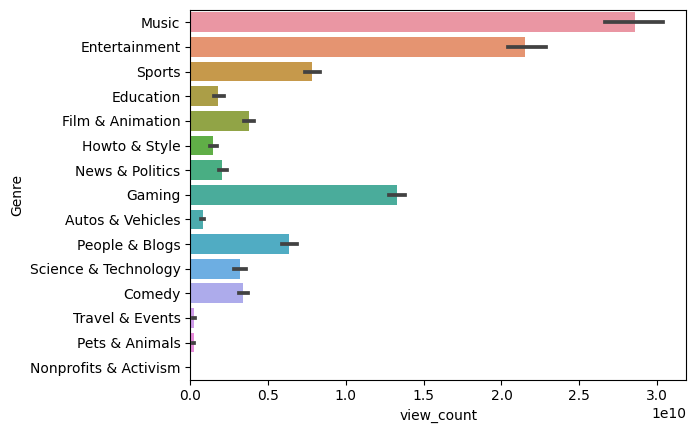

In [25]:
sns.barplot(y=odf['Genre'],x=odf['view_count'],estimator=sum)

<Axes: xlabel='likes', ylabel='Genre'>

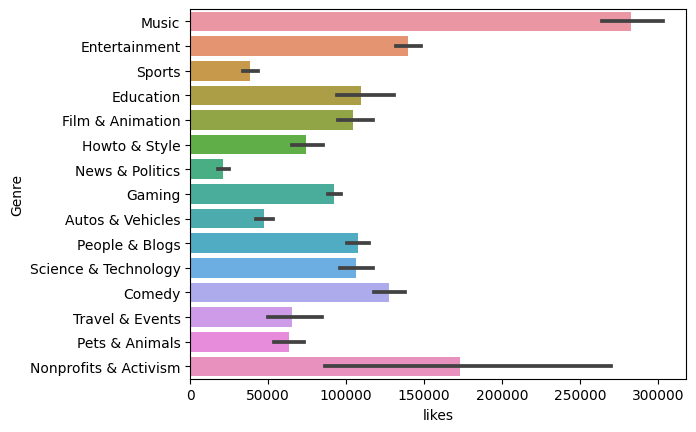

In [26]:
sns.barplot(y=odf['Genre'],x=odf['likes'])

In [27]:
# Making GUI for better analysing the realtion between important Metrics
# Graph vs Like
# Graph vs Dislike 
# Graph vs view_count
c=widgets.Dropdown(
    options=['likes','view_count','dislikes'],
    value='likes',
    description='Graph:',
    disabled=False,
)
def graph(a):
  sns.barplot(y='Genre',x=a, data=odf, estimator=sum)
  plt.show()

In [28]:
widgets.interact(graph, a = c)

interactive(children=(Dropdown(description='Graph:', options=('likes', 'view_count', 'dislikes'), value='likes…

<function __main__.graph(a)>

# First we saw some basic graphs of some important input features like Views Likes Dislikes view_count Genre Here we have a graph of views versus genre in which we can clearly see that music is the most views video on YouTube and news and Nonprofits & Activism is the least views video on the YouTube

# here we can see that the graph between dislikes and genre clearly indicates that music is most disliked video on YouTube where as Nonprofits & Activism is least disliked video on YouTube 'so here we can clearly see that the most disliked videos has the most view_count also'.

In [ ]:
#data.groupby(by='p_year').count()

<Axes: xlabel='p_year', ylabel='view_count'>

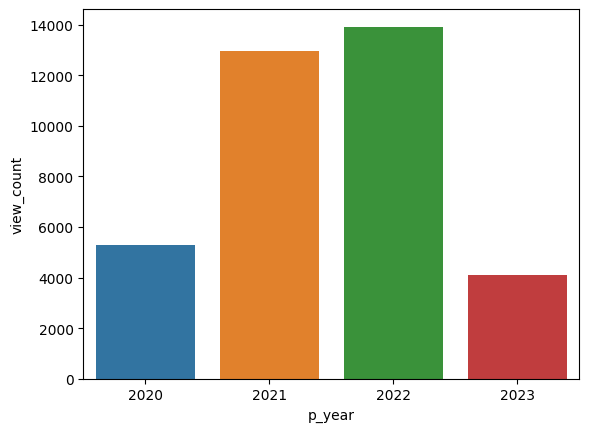

In [ ]:
# Making GUI for better analysing the realtion between publishedate and view_count
# Count of videos year vise 
sns.barplot(x=odf['p_year'],y=odf['view_count'],estimator=len)

In [ ]:
non = odf[odf['Genre']=='Sports']

In [ ]:
non.groupby(by='channelTitle').sum().sort_values(by='view_count',ascending=False)

<ipython-input-127-c6be4bd80a31>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  non.groupby(by='channelTitle').sum().sort_values(by='view_count',ascending=False)


,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,p_year,t_year
channelTitle,,,,,,,,,
NFL,5593,874000181,13768491,196900,1811375,0,3,665000,665009
NBA,5576,728587293,7831993,147444,1294850,0,0,663012,663020
Dude Perfect,1122,575470608,22735313,256533,1141029,0,0,133403,133405
FORMULA 1,1088,298614499,6494504,82871,419768,0,3,129384,129384
That's Amazing Shorts,119,198110470,13543924,278058,53704,0,1,14147,14147
...,...,...,...,...,...,...,...,...,...
Yung Mustard,17,95221,2627,89,904,0,0,2020,2020
Fox League,17,90446,973,0,100,0,0,2022,2022
Ariel Helwani,17,78031,4100,161,1074,0,0,2021,2021


In [29]:
# In which genre which youtube_channel is popular according to view_count
c=widgets.Dropdown(
    options=odf['Genre'].unique(),
    value='Sports',
    description='Graph:',
    disabled=False,
)
def graph(a):
  non = odf[odf['Genre']==a]
  dd = non.groupby(by='channelTitle').sum().sort_values(by='view_count',ascending=False).head(10)
  sns.barplot(y=dd.index,x=dd['view_count'])
  plt.title(a)
  plt.show()
  #plt.xticks(rotation = 45)

In [30]:
widgets.interact(graph, a = c)

interactive(children=(Dropdown(description='Graph:', index=2, options=('Music', 'Entertainment', 'Sports', 'Ed…

<function __main__.graph(a)>

here we can see that the graph between channel_titile and view_count clearly indicates that in Sport Genre NFL is most popular channel, on YouTube. and in Music Genre BLACKPINK is most popular channel like this in each Genre which channel is popular according to view_count

In [ ]:
odf['channelTitle'].unique()

array(['MigosVEVO', 'jf.okay', 'Television Academy', ..., 'thought',
       'Lakeland PBS', 'Magnolia Network'], dtype=object)

In [ ]:
odf.reset_index(inplace = True)

In [ ]:
x = odf[['likes','dislikes','comment_count','Genre']]

=========================================**ALGORITHM** **AND** **TRAINING** **OF** **MODEL**========================================

In [ ]:
x

,likes,dislikes,comment_count,Genre
0,262692,4107,16445,Music
1,17290,0,1439,Entertainment
2,8029,369,723,Entertainment
3,14603,0,2078,Sports
4,29991,320,998,Education
...,...,...,...,...
36274,47431,0,3586,People & Blogs
36275,728439,7579,57012,Music
36276,20024,989,2872,Sports
36277,584431,3403,77267,Music


In [ ]:
y = odf[['view_count']]

In [ ]:
y

,view_count
0,6823249
1,538485
2,682609
3,1280997
4,623949
...,...
36274,2603821
36275,13974461
36276,2598512
36277,9389223


In [ ]:
# LabelEncoder is used to convert categorical data or textual data is converting numerical data (one number is label to one value)
le = LabelEncoder()

In [ ]:
x['Genre'] = le.fit_transform(x['Genre'])

<ipython-input-167-4c8aa30c36b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Genre'] = le.fit_transform(x['Genre'])


**Here is the LinearRegression model to predict the view_count in based on (likes,dislikes,comment_count,Genre)**

In [ ]:
x

,likes,dislikes,comment_count,Genre
0,262692,4107,16445,7
1,17290,0,1439,3
2,8029,369,723,3
3,14603,0,2078,13
4,29991,320,998,2
...,...,...,...,...
36274,47431,0,3586,10
36275,728439,7579,57012,7
36276,20024,989,2872,13
36277,584431,3403,77267,7


In [ ]:
# Split data into two parts one is training data used to fit in models and one is test data which is used to test the model
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train,x_test = x[:20000],x[20000:]
y_train,y_test = y[:20000],y[20000:] 

In [ ]:
x_train

,likes,dislikes,comment_count,Genre
0,262692,4107,16445,7
1,17290,0,1439,3
2,8029,369,723,3
3,14603,0,2078,13
4,29991,320,998,2
...,...,...,...,...
19995,245947,0,11373,5
19996,7174,293,6473,8
19997,35010,0,3307,2
19998,23263,0,1518,7


In [ ]:
y_train

,view_count
0,6823249
1,538485
2,682609
3,1280997
4,623949
...,...
19995,3541107
19996,379442
19997,1176345
19998,509873


In [ ]:
# Import LinearRegression model present in sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
# Fit the training data into model to predict the view_count
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# accuracy rate of predict values (how much percentage accuratly it predict values)
lr.score(x_test,y_test)

0.7226031180878119

In [ ]:
#Here is Predict values
lr.predict(x_test.head(10))

array([[ 678471.50202642],
       [1426758.18684917],
       [1870040.48613071],
       [ 983904.27274158],
       [ 957880.9287186 ],
       [1379665.88361323],
       [2167205.80741872],
       [1130246.71991688],
       [1680582.76635784],
       [1012838.93905977]])

In [ ]:
# Here is Original values
np.array(y_test)

array([[ 337965],
       [1231498],
       [1396830],
       ...,
       [2598512],
       [9389223],
       [3079200]])

Here is another model **RandomForestRegressor**

In [ ]:
#Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
# Fit the training data into model to predict the view_count
rf.fit(x_train,y_train)

<ipython-input-203-895403b03771>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
# accuracy rate of predict values (how much percentage accuratly it predict values)
rf.score(x_test,y_test)

0.7320006110351855

In [ ]:
# Predict values
rf.predict(x_test.head(10))

array([ 388251.18,  937475.89, 1271650.89,  617065.04,  792745.29,
       1375549.65, 2301061.77, 1481963.35, 1130468.9 ,  519388.45])

In [ ]:
# Original values
np.array(y_test)

array([[ 337965],
       [1231498],
       [1396830],
       ...,
       [2598512],
       [9389223],
       [3079200]])